In [1]:
import webbpsf
import dLux as dl
import dLuxWebbpsf as dlW

import jax.numpy as np
import jax.random as jr

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import fits

plt.rcParams['image.origin'] = 'lower'

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-059 CANNOT BE CHECKED AGAINST ONLINE VERSION


dLux: Jax is running in 32-bit, to enable 64-bit visit: https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#double-64bit-precision


# Reading Data

In [4]:
data_path = '/Users/mcha5804/JWST/COM1093/stage2/'
filename = 'jw01093012001_02101_00001_nis_cal.fits'

In [5]:
HDUList = fits.open(data_path + filename)

print(HDUList.info())


Filename: /Users/mcha5804/JWST/COM1093/stage2/jw01093012001_02101_00001_nis_cal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     334   ()      
  1  SCI           1 ImageHDU        80   (64, 64)   float32   
  2  ERR           1 ImageHDU        10   (64, 64)   float32   
  3  DQ            1 ImageHDU        11   (64, 64)   int32 (rescales to uint32)   
  4  VAR_POISSON    1 ImageHDU         9   (64, 64)   float32   
  5  VAR_RNOISE    1 ImageHDU         9   (64, 64)   float32   
  6  VAR_FLAT      1 ImageHDU         9   (64, 64)   float32   
  7  ASDF          1 BinTableHDU     11   1R x 1C   [23614B]   
None


In [20]:
HDUList['PRIMARY'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
                                                                                
        AMI LG analysis data model                                              
                                                                                
DATE    = '2023-06-26T19:49:00.938' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01093-c1000_t001_niriss_f380m-nrm-sub80_amiavg.fits' / Name of the 
SDP_VER = '2023_1a '        

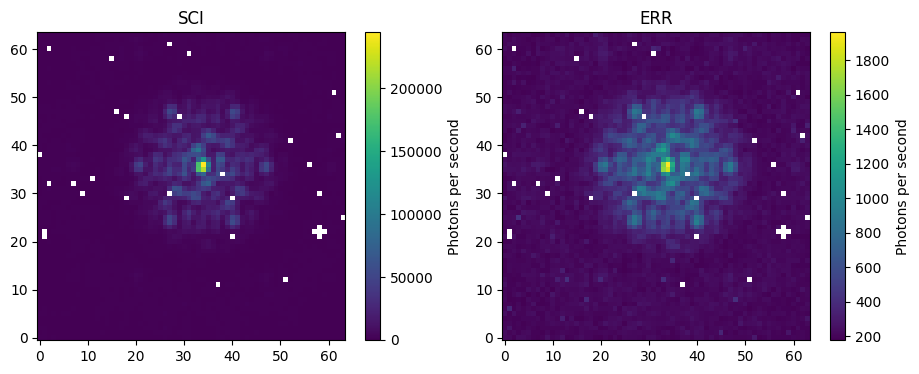

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (11,4))
c0 = ax[0].imshow(HDUList['SCI'].data)
ax[0].set(title="SCI")
fig.colorbar(c0, label='Photons per second')

c1 = ax[1].imshow(HDUList['ERR'].data)
ax[1].set(title="ERR")
fig.colorbar(c1, label='Photons per second')
plt.show()

In [31]:
class Polygon():
    
    def __init__(self, nsides):
        self.nsides = nsides


class Triangle(Polygon):

    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        super().__init__(3)

    def area(self):
        return 0.5 * self.a * self.b


class EquilateralTriangle(Triangle):

    def __init__(self, a):
        super().__init__(a, a, a)

    def tell_me_about_the_sides(self):
        print('All sides are equal!')


class IsocelesTriangle(Triangle):

    def __init__(self, a, b):
        super().__init__(a, a, b)

    def tell_me_about_the_sides(self):
        print('Two sides are equal!')

In [30]:
bartholomew = EquilateralTriangle(6.)

In [32]:
print(bartholomew.nsides)

3


In [33]:
class Source():
    """
    An object to represent a source.
    """

    def __init__(self, initial_position, final_position, lens_positions):

        self.initial_position = initial_position
        self.final_position = final_position
        self.lens_positions = lens_positions

    @property
    def distances(self):
        """

        """
        distances = []
        t_vals = []
        for lens in self.lens_positions:
            v = self.final_position - self.initial_position
            u = self.initial_position - lens
            w = self.final_position - lens
            t = -np.dot(v, u) / np.dot(v, v)

            if 0 < t < 1:
                pass
            else:
                end_cond = [np.dot(u, u), np.dot(w, w)]
                t = end_cond.index(min(end_cond))

            f = (1 - t) * self.initial_position + t * self.final_position - lens
            distance = np.sqrt(np.dot(f, f))

            t_vals.append(t)
            distances.append(distance)

        return t_vals, distances

In [37]:
src1 = Source((1., 1.), 2., 3.)

In [38]:
src1.distances

TypeError: 'float' object is not iterable